# Part I - Dataset Exploration of a Loan Data from Prosper

## by Rachael Olakunmi Ogunye

## Introduction


This project is in partial fulfilment of Udacity Data Analyst Nanodegree Program. I conducted an Exploratory Data Analysis on a loan dataset from Prosper, which is America’s first marketplace lending platform.
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income, borrower employment status, borrower credit  history and many others. The analysis is centered on simple univariate, bivariate and multivariate relationships.





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load the dataset into a dataframe and Assessing the data

In [2]:
# The first code loads the dataset into a dataframe while the second code is used to output the first five entries

df_prosper = pd.read_csv('prosperLoanData.csv')
df_prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# code outputs the number of rows and columns in the dataframe as a tuple

df_prosper.shape

(113937, 81)

In [4]:
# code gives a concise summary of the structure of the dataframe

df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# code gives a brief statistical summary of the dataframe

df_prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df_prosper.ListingNumber.duplicated().value_counts()

False    113066
True        871
Name: ListingNumber, dtype: int64

### Cleaning the Data

In [7]:
# code makes a copy of the dataframe and the cleaning process is carried out on the copy 

df_loan = df_prosper.copy()

#### Action Required: Subset dataframe by choosing features of interest.

In [8]:
# Subset dataframe by choosing features of interest. This is a dimensionality reduction
cols = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
df_loan = df_prosper[cols]

df_loan.sample(10)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
56207,1004454,2013-10-24 17:23:19.827000000,5000,Current,1,FL,0.21290,0.1760,2666.666667,C,Clerical,36,Employed,1.0,0.30,179.76,14.0,1
256,862319,2013-08-06 16:15:42.310000000,3000,Current,7,NY,0.21434,0.1774,7083.333333,C,Computer Programmer,36,Employed,5.0,0.11,108.07,21.0,1
35543,696615,2013-01-09 13:30:01.037000000,2000,Completed,1,WI,0.26528,0.2272,3500.000000,D,Engineer - Mechanical,36,Employed,8.0,0.09,77.13,17.0,47
87485,500150,2011-03-29 17:06:24.900000000,10645,Current,3,NJ,0.31420,0.2899,15416.666667,D,Other,60,Employed,14.0,0.09,337.82,28.0,111
22073,1119019,2014-01-17 17:25:03.410000000,9200,Current,1,TX,0.14206,0.1139,6916.666667,A,Other,36,Employed,2.0,0.16,302.90,16.0,89
46373,763960,2013-04-30 08:09:07.947000000,9500,Current,1,NY,0.28032,0.2419,5166.666667,D,Analyst,36,Employed,8.0,0.19,373.66,15.0,1
32212,989378,2013-11-02 14:49:34.677000000,7000,Current,1,OH,0.15324,0.1249,3416.666667,A,Administrative Assistant,36,Employed,3.0,0.18,234.14,29.0,1
92684,645872,2012-09-26 20:30:04.063000000,15000,Chargedoff,1,NC,0.24302,0.2181,3250.000000,C,Medical Technician,60,Employed,4.0,0.36,412.66,20.0,24
71645,381350,2008-08-11 22:23:16.250000000,1500,Completed,1,NJ,0.37453,0.3500,5416.666667,NaN,Other,36,Full-time,3.0,0.23,67.85,30.0,21
47794,292658,2008-03-13 04:38:33.963000000,9500,Completed,4,NY,0.13814,0.1240,4092.000000,NaN,Civil Service,36,Full-time,5.0,0.42,317.35,36.0,176


In [9]:
# code gives a concise summary of the structure of the dataframe

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
LoanOriginalAmount           113937 non-null int64
LoanStatus                   113937 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
StatedMonthlyIncome          113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
Occupation                   110349 non-null object
Term                         113937 non-null int64
EmploymentStatus             111682 non-null object
TotalInquiries               112778 non-null float64
DebtToIncomeRatio            105383 non-null float64
MonthlyLoanPayment           113937 non-null float64
TotalTrades                  106393 non-null float64
Inv

In [10]:
# code checks and outputs the sum of all null values in each column

df_loan.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
LoanOriginalAmount               0
LoanStatus                       0
ListingCategory (numeric)        0
BorrowerState                 5515
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
ProsperRating (Alpha)        29084
Occupation                    3588
Term                             0
EmploymentStatus              2255
TotalInquiries                1159
DebtToIncomeRatio             8554
MonthlyLoanPayment               0
TotalTrades                   7544
Investors                        0
dtype: int64

#### Quality Issues Observed
1. Missing data
2. Wrong representation of datatypes


#### Action Required
1. Drop duplicate rows.
2. Select rows with 'non-null' values in the ProsperRating column.
3. Fill missing values in the 'Occupation' column with 'Unknown' and those in the 'DebtToIncomeRatio' column with the mean.
4. Convert datatypes - 'TotalTrades' and 'TotalInquiries' to int and 'ListingCreationDate' to datetime.
5. Split 'ListingCreationDate' column into 'LoanTime', 'LaonDay', 'LoanMonth' and 'LoanYear'.

In [11]:
# code drop duplicate rows

df_loan = df_loan.drop_duplicates()

In [12]:
# select rows where ProsperRating is not null as the ProsperRating is one of the most important features of the dataset 
# and filling in missing values with Unknown is not ideal
df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

In [13]:
# fill missing values for the 'Occupation' column with 'Unknown'

df_loan.Occupation = df_loan.Occupation.fillna('Unknown')

In [14]:
# The missing values in the DebtToIncomeRatio column will be filled with the mean of the column

df_loan.DebtToIncomeRatio = df_loan.DebtToIncomeRatio.fillna(df_loan.DebtToIncomeRatio.mean())

In [15]:
# convert datatypes of the 'TotalInquires' and 'TotalTrades'

df_loan.TotalInquiries = df_loan.TotalInquiries.astype(int)
df_loan.TotalTrades = df_loan.TotalTrades.astype(int)

In [16]:
# Code splits the 'ListingCreationDate' column into year and month

df_loan['LoanYear']=df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_loan['LoanMonth'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [17]:
# code outputs the unique values of month

df_loan.LoanMonth.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

In [18]:
# replace numerical values of month with month names

df_loan.LoanMonth.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [19]:
# code confirms the change in the values of month

df_loan.LoanMonth.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [20]:
df_loan['ListingCreationDate'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [21]:
# Code splits the 'ListingCreationDate' column into day and time

df_loan['LoanDay'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_loan['LoanTime'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [22]:
# code drops the original 'ListingCreationDate' column
df_loan.drop(columns = ['ListingCreationDate'],inplace = True)

In [23]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
ListingNumber                83982 non-null int64
LoanOriginalAmount           83982 non-null int64
LoanStatus                   83982 non-null object
ListingCategory (numeric)    83982 non-null int64
BorrowerState                83982 non-null object
BorrowerAPR                  83982 non-null float64
BorrowerRate                 83982 non-null float64
StatedMonthlyIncome          83982 non-null float64
ProsperRating (Alpha)        83982 non-null object
Occupation                   83982 non-null object
Term                         83982 non-null int64
EmploymentStatus             83982 non-null object
TotalInquiries               83982 non-null int64
DebtToIncomeRatio            83982 non-null float64
MonthlyLoanPayment           83982 non-null float64
TotalTrades                  83982 non-null int64
Investors                    83982 non-null int64
LoanYear                 

In [24]:
df_loan.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000
mean,7.712395e+05,9061.224381,3.321771,0.226945,0.19630,5.930614e+03,42.462813,4.285514,0.258692,291.40139,23.925115,68.677788
std,2.359100e+05,6279.649648,4.368851,0.080047,0.07475,8.268432e+03,11.639032,3.828780,0.305687,186.47539,11.610432,95.318077
min,4.162750e+05,1000.000000,0.000000,0.045830,0.04000,0.000000e+00,12.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,5.570608e+05,4000.000000,1.000000,0.163610,0.13590,3.426938e+03,36.000000,2.000000,0.160000,157.11250,15.000000,1.000000
50%,7.341785e+05,7500.000000,1.000000,0.219450,0.18750,5.000000e+03,36.000000,3.000000,0.240000,251.28000,23.000000,32.000000
75%,9.756778e+05,13500.000000,3.000000,0.292540,0.25740,7.083333e+03,60.000000,6.000000,0.310000,387.62000,31.000000,98.000000
max,1.255725e+06,35000.000000,20.000000,0.423950,0.36000,1.750003e+06,60.000000,78.000000,10.010000,2251.51000,122.000000,1189.000000


In [25]:
df_loan.shape

(83982, 21)

### What is the structure of your dataset?

> There are 113,937 entries in the main dataset with 81 features. The subset dataset (df_loan) contains 83982 loan entries with 21 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus and many others). Most variables are numeric in nature.


### What is/are the main feature(s) of interest in your dataset?

> I am interested in figuring out the features that are best for predicting the Borrower's Annual Percentage Rate (APR) which is the main variable of interest for the loan and how Loan original amount and Prosper ratings associates with various metrics in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the loan amount will have a negative effect on the Annual Percentage Rate (APR) of the loan; the larger the loan amount, the lower the APR. The borrower's stated monthly income, loan term, Prosper rating and employment status will also have effects on the APR. Employment status, occupation and stated monthly income will also likely affect the ProsperRating and loan Amount.

## Univariate Exploration

#### Question 1:  Is there a similarity between the distributions of BorrowerAPR and BorrowerRate?


> **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan. The BorrowerAPR is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage  insurance, most closing costs, discount points and loan origination  fees) to reflect the total cost of the loan.


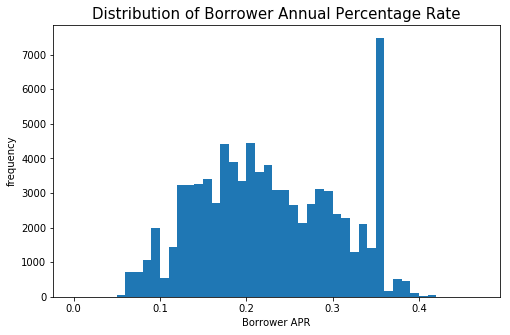

In [26]:
# the distribution of the main variable of interest: BorrowerAPR
        
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('frequency');
plt.title('Distribution of Borrower Annual Percentage Rate', fontsize=15);

The distribution is a normal multimodal distribution with small peaks around 0.1, 0.2 and 0.3. There is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43. BorrowerAPR is the main variable of interest.


> **BorrowerRate**: The Borrower's interest rate for this loan. The BorrowerRate (interest rate) refers to the annual cost of a loan to  a borrower and is expressed as a percentage. The interest rate does not  include fees charged for the loan.

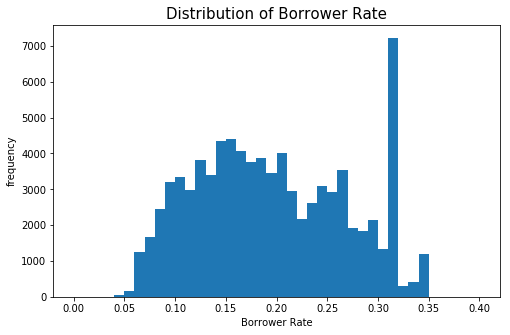

In [27]:
# the distribution of BorrowerRate
        
bins = np.arange(0, df_loan.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x='BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate');
plt.ylabel('frequency');
plt.title('Distribution of Borrower Rate', fontsize=15);

The distribution is a normal multimodal distribution with small peaks around 0.1, 0.15, 0.2, 0.25, 0.3 and 0.35. There is a very shape peak between 0.31 and 0.32. There are no loans with BorrowerRate greater than 0.35.

The distributions of BorrowerAPR and BorrowerRate are similar with a slight difference since the APR is always higher than the interest rate. Also, borrower's Annual Percentage Rate contain some fees (such as discount points, most closing costs, mortgage insurance, and loan origination fees) which of course affect the total cost of loan.


> **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR. The Prosper Rating is expressed as a letter grade that indicates the expected level of risk associated with a loan listing.  Each letter grade (AA, A, B, C, D, E or HR) corresponds to an estimated average annualized loss rate range. AA (lower risk, lower return) to HR (higher risk, higher return).

> **Employment Status**: The employment status of the borrower at the time they posted the listing

> **Occupation**: The Occupation selected by the Borrower at the time they created the listing.

In [28]:
# Convert ProsperRating and Employment status into ordered categorical types
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype(ordered_var)

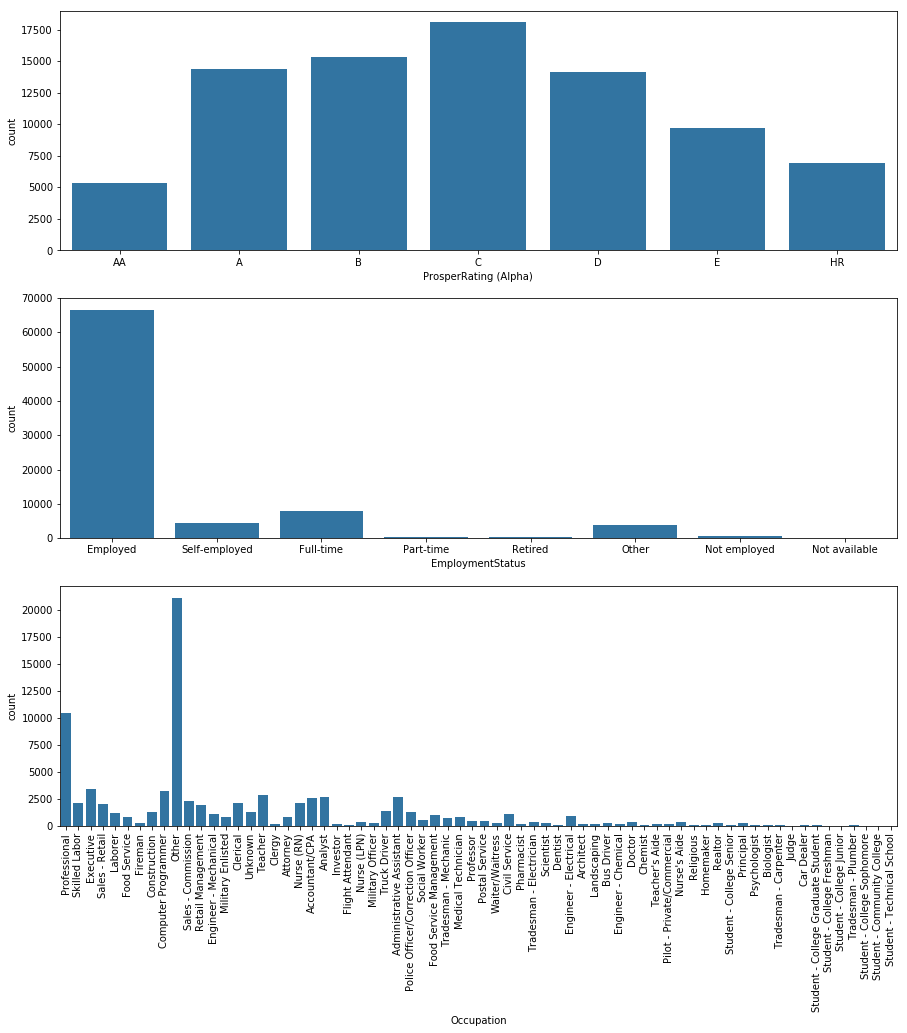

In [29]:
# the distributions of ProsperRating, EmploymentStatus and Occupation

fig, ax = plt.subplots(nrows=3, figsize = [15,15])
base_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = base_color, ax = ax[0]);
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = base_color, ax = ax[1]);
sb.countplot(data = df_loan, x = 'Occupation', color = base_color, ax = ax[2]);
plt.xticks(rotation=90);

Asides from the **‘Other’** and **‘Professional’** occupation categories, the borrower's top five occupations are **‘Computer programmer’, ‘Executives’, ‘Teacher’, ‘Administrative Assistant’, and ‘Analyst’**. The least borrowers are **‘Students’**.

The ratings of most of the borrowers are among A to D with C being the highest rating. 
Most of the borrowers are employed and working full-time.

In [30]:
# Convert LoanMonth into ordered categorical types

rate_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['LoanMonth'] = df_loan['LoanMonth'].astype(ordered_var)
df_loan.groupby('LoanMonth')['ListingNumber'].count()

LoanMonth
Jan     9036
Feb     7887
Mar     5376
Apr     4906
May     5469
Jun     5805
Jul     6630
Aug     6401
Sept    7480
Oct     8586
Nov     8122
Dec     8284
Name: ListingNumber, dtype: int64

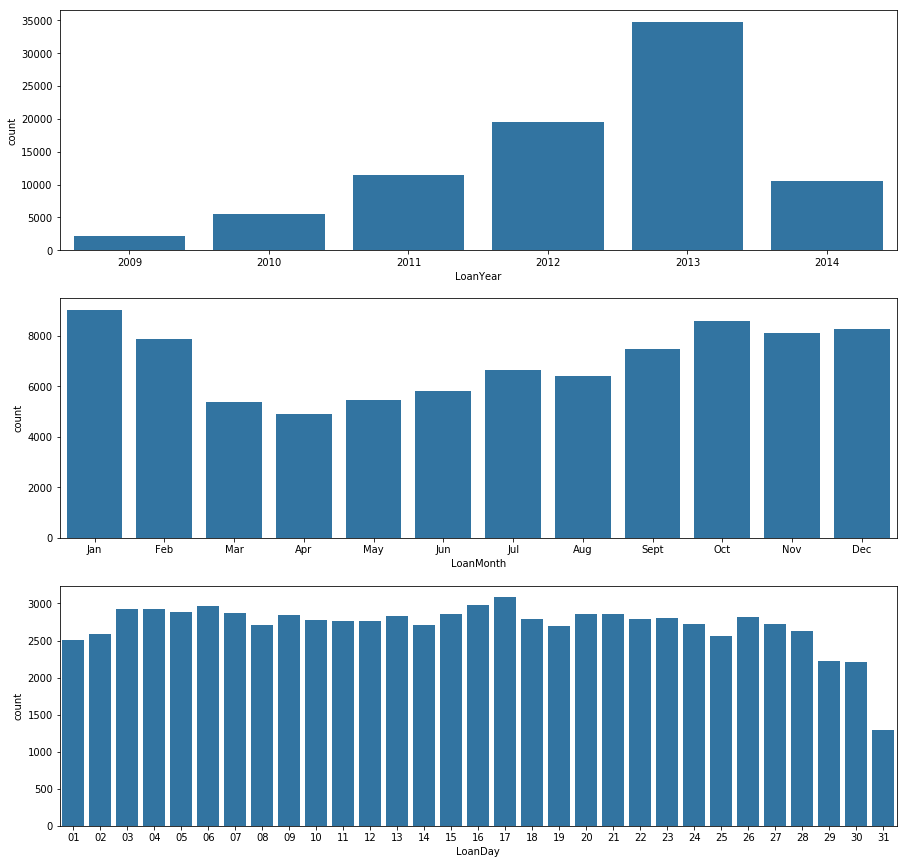

In [31]:
# countplots of loanYear, LoanMonth and LoanDay

fig, ax = plt.subplots(nrows=3, figsize = [15,15])
base_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'LoanYear', color = base_color, ax = ax[0]);
sb.countplot(data = df_loan, x = 'LoanMonth', color = base_color, ax = ax[1]);
sb.countplot(data = df_loan, x = 'LoanDay', color = base_color, ax = ax[2]);

Most loans are obtained around the middle of the month as observed in the LoanDay plot which can be said to be the time around which borrowers would have exhausted their monthly incomes while January has the highest loan frequency as observed in the LoanMonth plot. Majority of borrowers obtained loans in the year 2013.


> **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

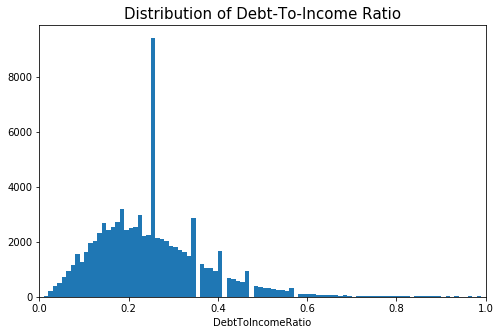

In [32]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim(0,1)
plt.xlabel('DebtToIncomeRatio');
plt.title('Distribution of Debt-To-Income Ratio', fontsize=15);

The distribution of the DebtToIncomeRatio is highly skewed to the right by the presence of those with very high incomes to their debt. The distribution has a unimodal peak around 0.2 with unusual peak around 0.25 which indicates most people prefer 1:4 ratio of debt to Income which is a good thing. I also limited the x-axis.


> The **StatedMonthlyIncome** is the monthly income the borrower stated at the  time when the listing was created.

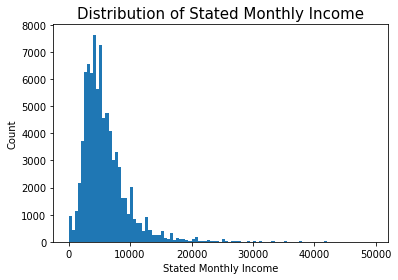

In [33]:
# Distribution of StatedMonthlyIncome

bins = np.arange(0, 50000, 500)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count')
plt.title('Distribution of Stated Monthly Income', fontsize=15);

The histogram of the distribution is highly skewed to the right with most of the stated monthly income less than 30k. There are also outliers in the distribution.

In [34]:
# Code outputs the percentage of borrowers with StatedMonthlyIncome greater than 30k

(df_loan.StatedMonthlyIncome>30000).sum()/float(df_loan.shape[0])

0.0029291991140958777

In [35]:
# Less than 0.3 percent of the borrowers have StatedMonthlyIncome greater than 30k,
# these can be called outliers for the purpose of this analysis, 
# so it is better to remove borrower records with income greater than 30k.

# remove entries with StatedMonthlyIncome greater than 30k, which are outliers

df_loan = df_loan[df_loan.StatedMonthlyIncome<=30000]

(df_loan.StatedMonthlyIncome>30000).sum()

0

In [36]:
df_loan.shape

(83736, 21)


> **LoanOriginalAmount**: The origination amount of the loan.

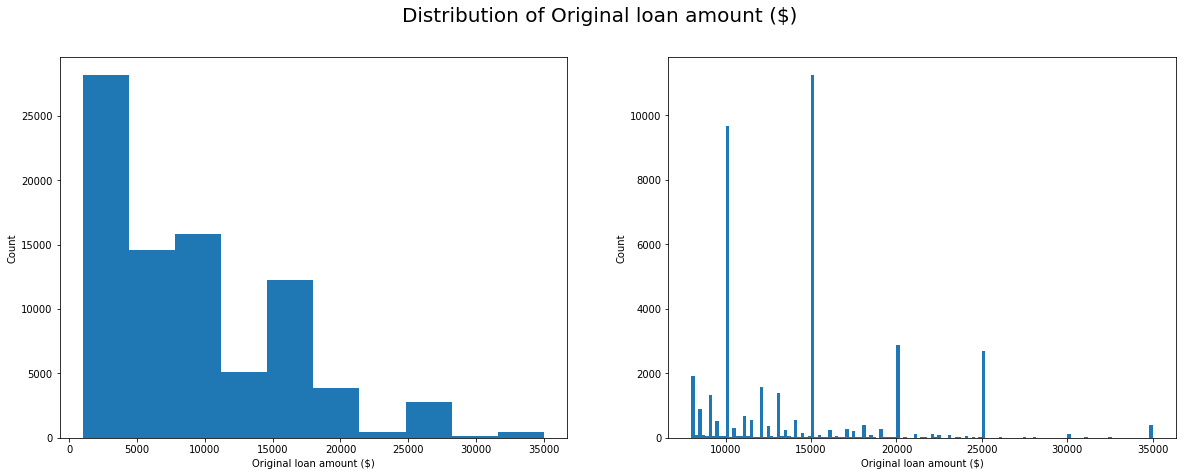

In [37]:
# distribution of LoanOriginalAmount

plt.figure(figsize = [20,7])
plt.suptitle('Distribution of Original loan amount ($)', fontsize=20)
plt.subplot(1,2,1)
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)');
plt.ylabel('Count');

plt.subplot(1,2,2)
bins = np.arange(8000, df_loan.LoanOriginalAmount.max()+200, 200)
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)')
plt.ylabel('Count');

Very large spikes in frequency are observed at 10k, 15k, 20k, 25k and 35k. . It means that most of the loans are multiples of 5k. There are also small spikes at 8k, 9k, 11k, 12k, 13k, 14k etc. It means that some of the loans are in multiples of 1k.

> **LoanTerm**: The length of the loan expressed in months.

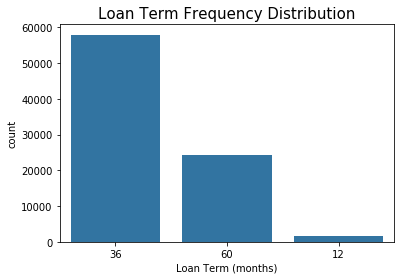

In [38]:
# distribution of Loan Term

base_color = sb.color_palette()[0]
type_order = df_loan['Term'].value_counts().index
sb.countplot(data = df_loan, x = 'Term', color = base_color, order = type_order);
plt.xlabel('Loan Term (months)');
plt.title('Loan Term Frequency Distribution', fontsize=15);

The length of most loans are 36 months, followed by 60 months. There are a few 12-month termed loans. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of BorrowerAPR, the main variable of interest is a normal multimodal distribution. The distribution of the BorrowerRate, another variable of interest is also normal and multimodal.
There were no unusual points and no need to perform any transformations.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of stated monthly income is highly skewed to the right with most of the stated monthly income less than 30k. There are also outliers in the distribution as some values were incredibly high (greater than 100k). Most borrowers with monthly income greater than 100k only loan less than 5k dollars. Overall, Less than 0.3 percent of the borrowers have stated monthly income greater than 30k, hence I dropped the records with income greater than 30k.

> DebtToIncomeRatio is also highly skewed to the right by the presence of those with very high incomes to their debt. The distribution has a unimodal peak. I limited the x-axis to focus on the distribution.

> There is no need to perform any transformations on the other variables.

## Bivariate Exploration


### Question 2: What is the pairwise correlation between the features in the data?

In [39]:
numeric_vars = df_loan.select_dtypes(include='number').columns
categoric_vars = ['Term', 'Occupation', 'EmploymentStatus', 'ProsperRating (Alpha)']

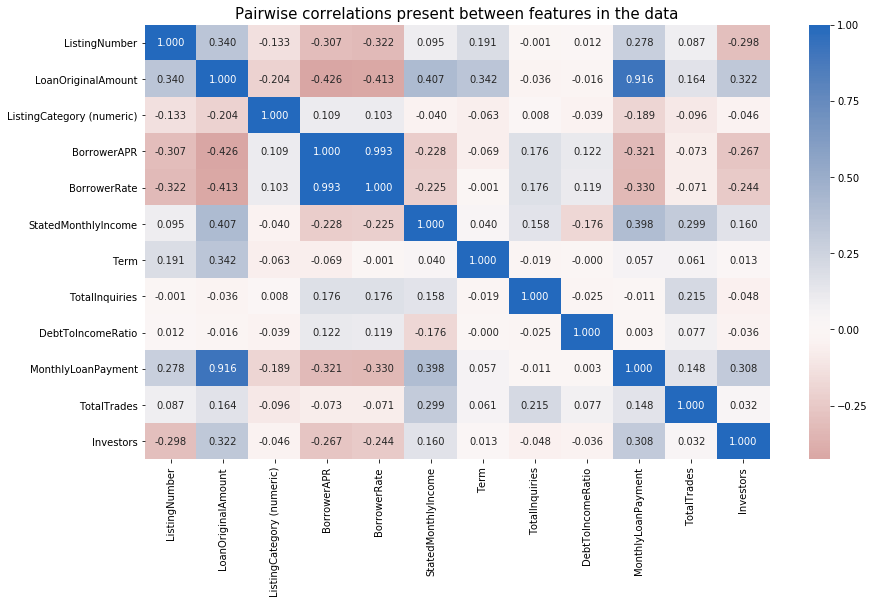

In [40]:
# code outputs correlation plot
plt.figure(figsize = [14, 8])
sb.heatmap(df_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Pairwise correlations present between features in the data", fontsize=15)
plt.show()

In [41]:
# Code selects the numeric variables of interest

num_vars = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']

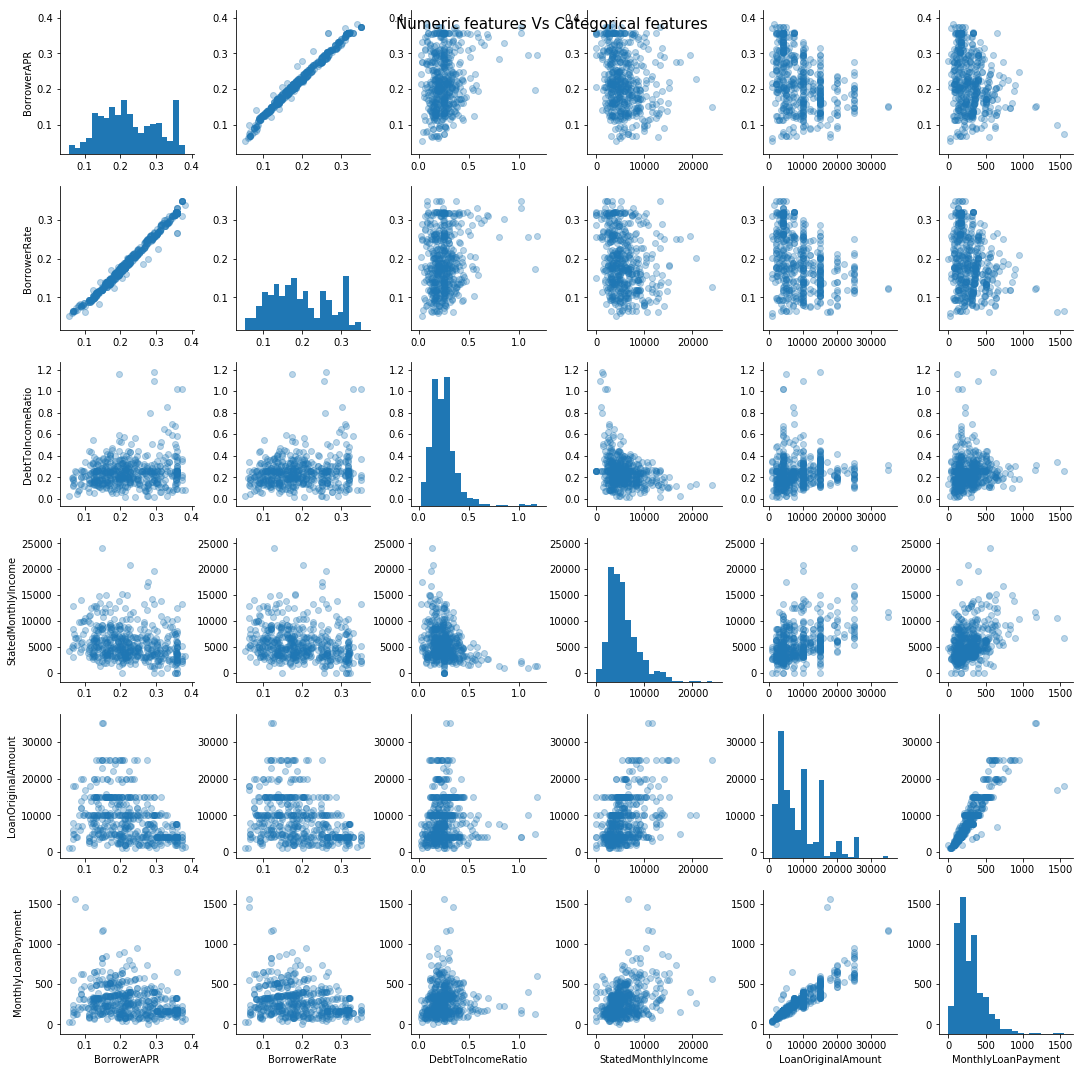

In [42]:
# 500 sample loans will be used in the plot matrix so that plots are clearer and they render faster

samp_loan = df_loan.sample(500)
g = sb.PairGrid(data = samp_loan, vars = num_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter, alpha=0.3);
g.fig.suptitle('Numeric features Vs Categorical features', fontsize=15);

> BorrowerRate and BorrowerAPR are highly positively correlated (0.993), which makes sense since their distributions are similar with only a slight difference.

> The correlation coefficient of BorrowerAPR and LoanOriginalAmount is -0.426, the scatter plot also shows that these two variables are negatively correlated, which agrees with the hypothesis, that the more the loan amount, the lower the APR. 

> The LoanOriginalAmount is positively correlated with the StatedMonthlyIncome, it makes sense since borrowers with more monthly income could loan more money.

> The LoanOriginalAmount is highly positively correlated with the MonthlyLoanPayment (0.916), it makes sense since borrowers tend to offset their loans by month end.


### Question 3: How does the LoanOriginalAmount relate to BorrowerAPR?

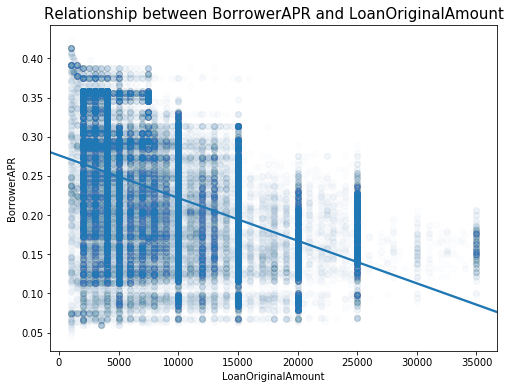

In [43]:
# code outputs a regression plot

plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('Relationship between BorrowerAPR and LoanOriginalAmount', fontsize=15);

> This plot shows that at different loan amounts, the APR has a wide range, but the range of APR decreases with increasing loan amount. The plot shows that the borrowerAPR is negatively correlated with loan amount.


### Question 4: What is the most common Employment Status in each Prosper Rating ?

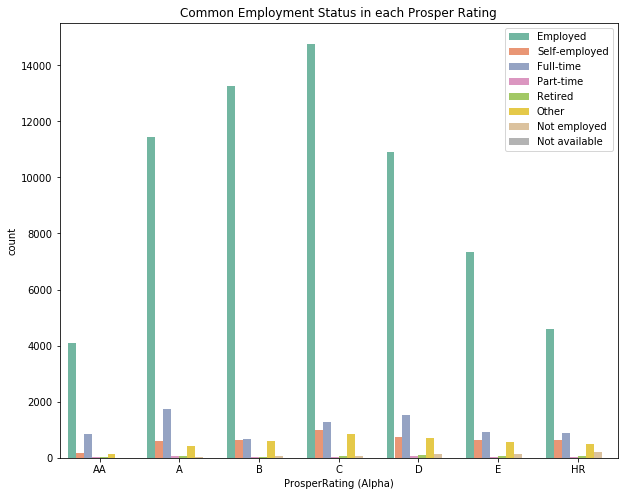

In [44]:
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
plt.figure(figsize = [10, 8])
sb.countplot(data=df_loan, x='ProsperRating (Alpha)', order=order, hue='EmploymentStatus', palette='Set2');
plt.legend(loc=1);
plt.title("Common Employment Status in each Prosper Rating");

> A vast majority of borrowers in each prosper rating are employed. I can infer that it is mostly the employed population that take loans


### Question 5: How does BorrowerAPR, BorrowerRate, StatedMonthlyIncome and LoanOriginalAmount relate to LoanTerm and ProsperRating?

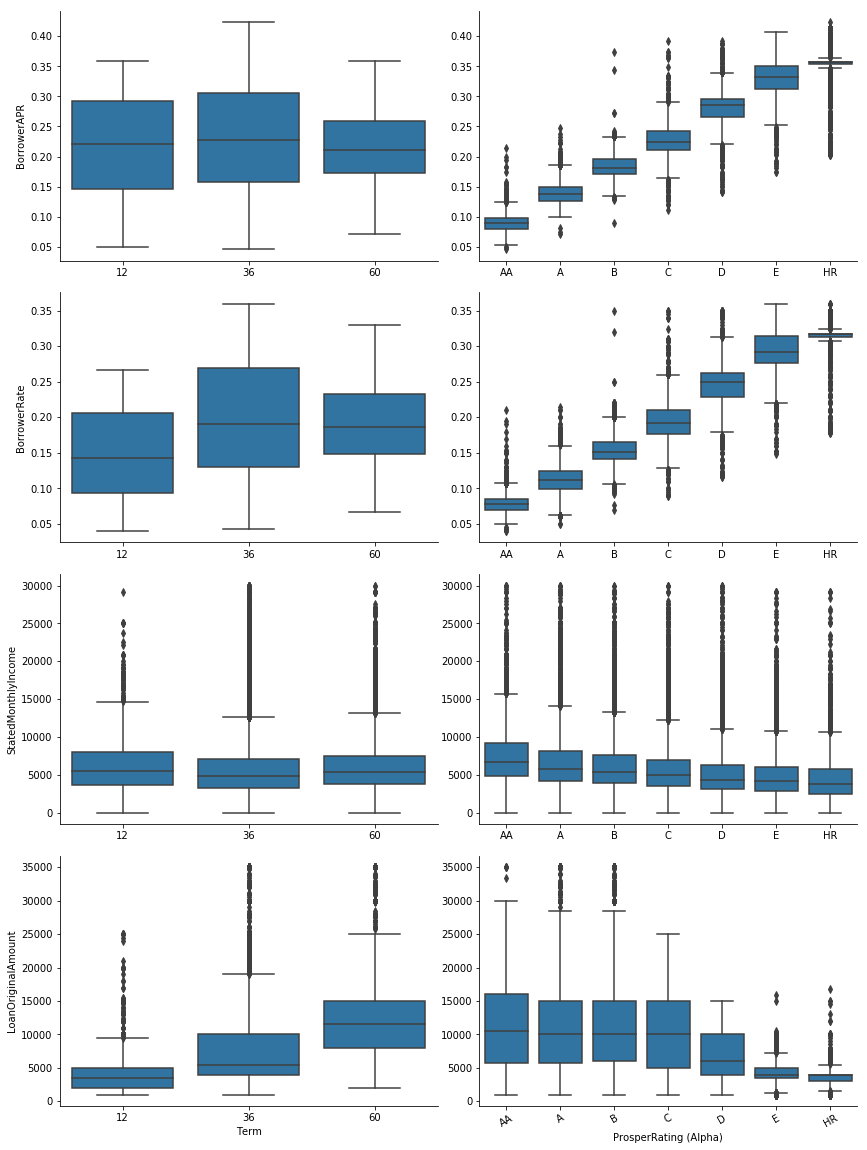

In [45]:
# code plots matrix of numeric features against ProsperRating.

def boxgrid(x, y, **kwargs):
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = ['Term', 'ProsperRating (Alpha)'], size = 4, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=30);

> The plot above shows that the original loan amount increases with increasing loan term and decreases with increasing Prosper rating. 

> The borrower's annual percentage rate (APR) and BorrowerRate (interest rate) increases with increasing Prosper ratings. Borrowers with the best Prosper ratings have the highest APR and interest rates. It means that the Prosper rating has a strong effect on BorrowerAPR and BorrowerRate. 

> Also, the stated monthly income decreases as the prosper ratings increases.


### Question 6: What is the relationship between Term, ProsperRating and EmploymentStatus?

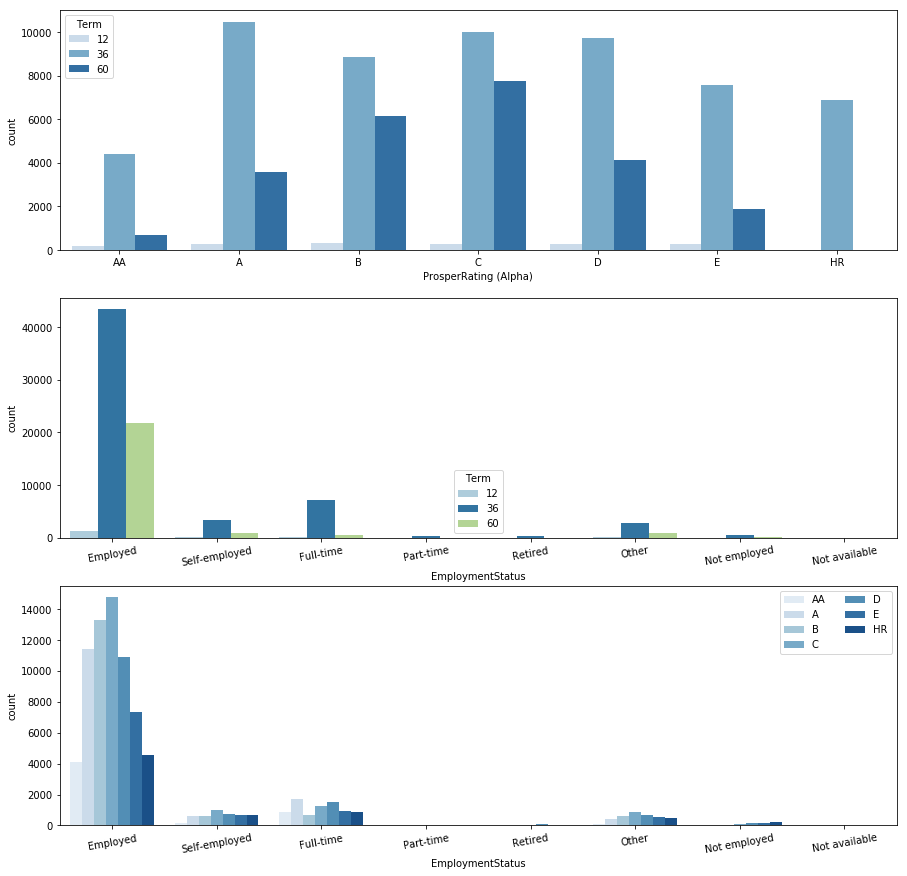

In [46]:
plt.figure(figsize = [15, 15])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', order = order, palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Paired')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', hue_order = rate_order, palette = 'Blues')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

> From the plots, we can see that there are more 36-month termed loans for all ProsperRatings and EmploymentStatus. Also, ProsperRating C had more counts among the Employed, Self-employed and 'Other' employment status borrowers, while ProsperRating A had more counts among the Full-time borrowers. The HR rating has only one Loan term (36 months).


### Question 7: How does LoanTerm relate to Occupation?

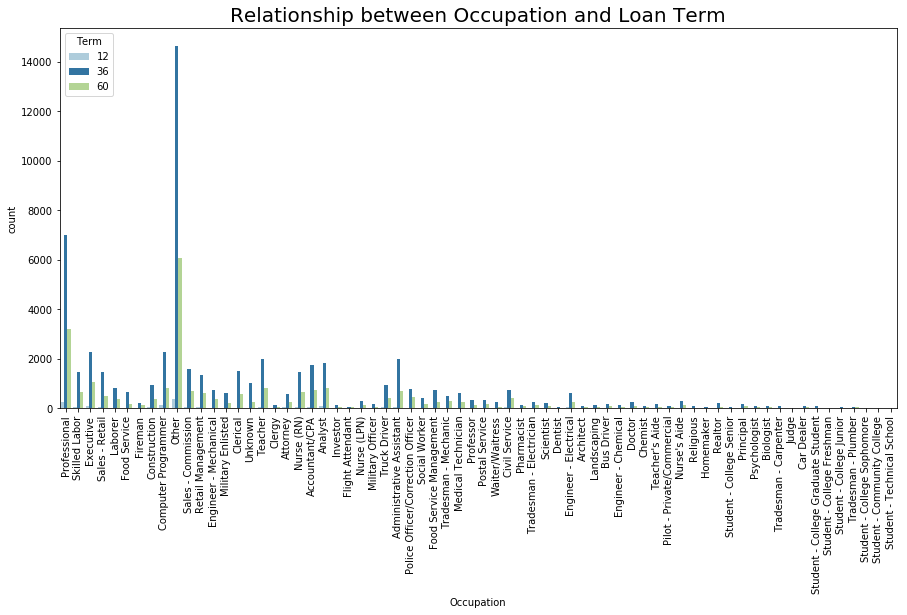

In [47]:
# plot of Occupation vs term

plt.figure(figsize = [15,7])
sb.countplot(data = df_loan, x = 'Occupation', hue = 'Term', palette = 'Paired');
plt.xticks(rotation=90);
plt.title('Relationship between Occupation and Loan Term', fontsize=20);

> Majority of loans were 36-month termed in almost all the various occupations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerRate and BorrowerAPR are highly positively correlated (0.993), which makes sense since their distributions are similar with only a slight difference.

> The correlation coefficient of BorrowerAPR and LoanOriginalAmount is -0.426, which implies negative correlation, which agrees with our hypothesis, that the more the loan amount, the lower the APR.

> At different loan amounts, the APR has a wide range, but the range of APR decreases with increasing loan amount. 

> The borrower's annual percentage rate (APR) and BorrowerRate (interest rate) increases with increasing Prosper ratings. Borrowers with the best Prosper ratings have the highest APR and interest rates. It means that the Prosper rating has a strong effect on BorrowerAPR and BorrowerRate.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The LoanOriginalAmount is positively correlated with the StatedMonthlyIncome, it makes sense since borrowers with more monthly income could loan more money.

> The LoanOriginalAmount is highly positively correlated with the MonthlyLoanPayment (0.916), it makes sense since borrowers tend to offset their loans at month ends.

> A vast majority of borrowers in each prosper rating are employed. I can infer that it is mostly the employed population that take loans.

> The original loan amount increases with increasing loan term.

> Majority of loans were 36-month termed in almost all the various occupations.

> The stated monthly income decreases as the prosper ratings increases.

> There are more 36-month termed loans for all ProsperRatings and EmploymentStatus. Also, ProsperRating C had more counts among the Employed, Self-employed and 'Other' employment status borrowers, while ProsperRating A had more counts among the Full-time borrowers.

## Multivariate Exploration

### Question 8: How does ProsperRating and LoanTerm affect BorrowerAPR?

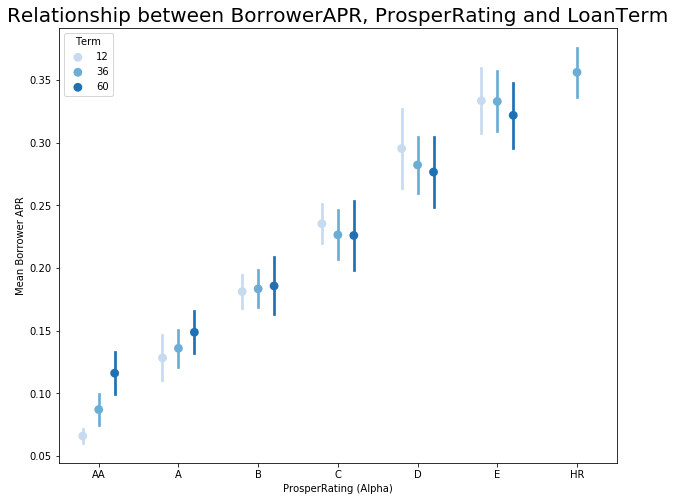

In [48]:
# code uses a pointplot to show the relationship between the variables

plt.figure(figsize = [10,8])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Relationship between BorrowerAPR, ProsperRating and LoanTerm', fontsize=20)
plt.ylabel('Mean Borrower APR');

> From the plot, BorrowerAPR increases with increasing Loan term for borrowers with AA, A & B ratings, while the APR decreases with increasing Loan term for borrowers with C, D and E ratings. 


### Question 9: What is the relationship between BorrowerAPR, ProsperRating and LoanOriginalAmount?

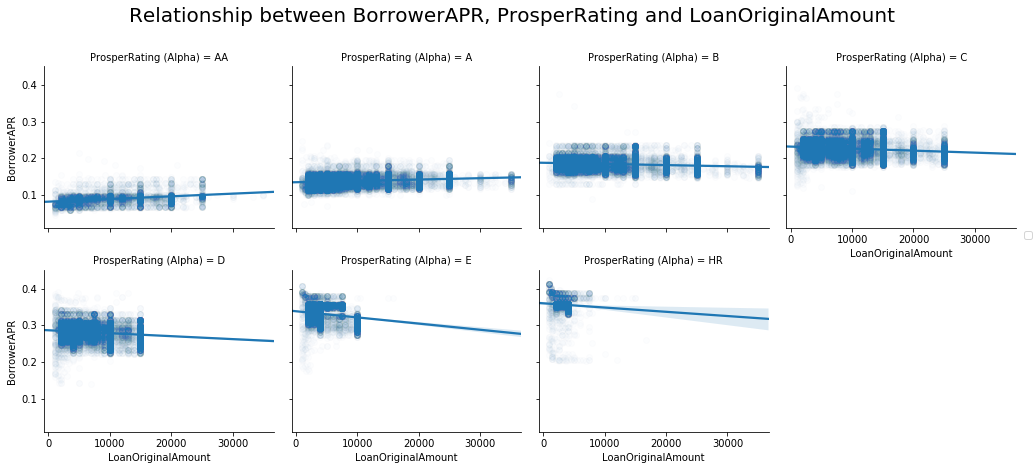

In [49]:
# code uses a regplot to show the relationship between the variables

g = sb.FacetGrid(data=df_loan, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.01});
# plt.title('Relationship between BorrowerAPR, ProsperRating and LoanOriginalAmount');
g.fig.suptitle('Relationship between BorrowerAPR, ProsperRating and LoanOriginalAmount', fontsize=20, y=1.08);
g.add_legend();

> The loan amount decreases with increasing Prosper rating while the borrower's APR increases with increasing Prosper rating. Interestingly, the relationship between borrower APR and loan amount turns from slightly positive to negative when the Prosper ratings are increased from AA to HR.


### Question 10: Is there a relationship between EmploymentStatus, LoanTerm and BorrowerAPR?

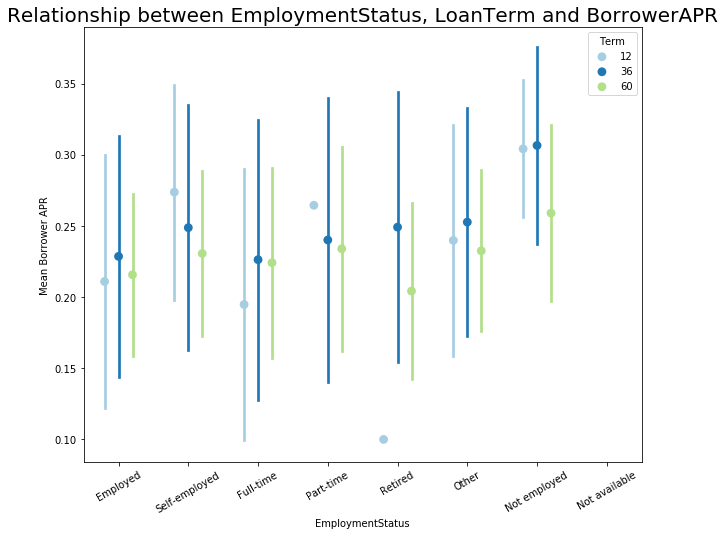

In [50]:
# code uses a pointplot to show the relationship between the variables

fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Paired', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Relationship between EmploymentStatus, LoanTerm and BorrowerAPR', fontsize=20)
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 30);

> From the plot, BorrowerAPR decreases with increasing Loan term for Self-employed, Part-time and Retired borrowers. The APR was slightly elevated for 36-month termed loans for the other employment statuses.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> BorrowerAPR increases with increasing Loan term for borrowers with AA, A & B ratings, while the APR decreases with increasing Loan term for borrowers with C, D and E ratings.

> The loan amount decreases with increasing Prosper rating while the borrower's APR increases with increasing Prosper rating. Interestingly, the relationship between borrower APR and loan amount turns from slightly positive to negative when the Prosper ratings are increased from AA to HR.

> BorrowerAPR decreases with increasing Loan term for Self-employed, Part-time and Retired borrowers. The APR was slightly elevated for 36-month termed loans for the other employment statuses.



### Were there any interesting or surprising interactions between features?

> An interesting interaction I observed is that BorrowerAPR decreases as Loan term increases for Prosper ratings below C while the APR increases with increasing Loan term for Prosper ratings above C. Also the negative correlation between BorrowerAPR and Loan amount in Prosper ratings B and below turned slightly positive in Prosper ratings A and above.

## Conclusions

> The distributions of BorrowerAPR and BorrowerRate are similar with a slight difference since the APR is always higher than the interest rate.

> The borrower's top five occupations are **‘Computer programmer’, ‘Executives’, ‘Teacher’, ‘Administrative Assistant’, and ‘Analyst’**. The least borrowers are **‘Students’**.

> The length of most loans are 36 months, followed by 60 months. There are a few 12-month termed loans. This should have a direct effect on Borrower's Rate.

> BorrowerAPR decreases with increasing loan amount (negatively correlated).

> The borrower's annual percentage rate (APR) and BorrowerRate (interest rate) decreases with increasing Prosper ratings. Borrowers with the best Prosper ratings have the lowest APR and interest rates. It means that the Prosper rating has a strong effect on BorrowerAPR and BorrowerRate.

> Loan amount and Prosper ratings are the best predictors of BorrowerAPR


In [51]:
# save the cleaned dataset for explanatory data analysis
df_loan.to_csv('CleanedLoanData.csv', index=False)